In [1]:
from google.colab import files
uploaded = files.upload()


Saving data.zip to data.zip


In [2]:
import zipfile
import os

with zipfile.ZipFile("data.zip", "r") as zip_ref:
    zip_ref.extractall()

print("✅ Zip extracted!")


✅ Zip extracted!


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/12852 [00:00<?, ? examples/s]

Map:   0%|          | 0/3214 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were n

Epoch 1/7
804/804 [==============================] - 195s 212ms/step - loss: 0.4282 - accuracy: 0.8497 - val_loss: 0.2225 - val_accuracy: 0.9172
Epoch 2/7
804/804 [==============================] - 172s 214ms/step - loss: 0.1463 - accuracy: 0.9381 - val_loss: 0.1641 - val_accuracy: 0.9250
Epoch 3/7
804/804 [==============================] - 172s 214ms/step - loss: 0.1136 - accuracy: 0.9499 - val_loss: 0.1851 - val_accuracy: 0.9291
Epoch 4/7
804/804 [==============================] - 173s 215ms/step - loss: 0.1004 - accuracy: 0.9515 - val_loss: 0.1582 - val_accuracy: 0.9259
Epoch 5/7
804/804 [==============================] - 173s 215ms/step - loss: 0.0807 - accuracy: 0.9619 - val_loss: 0.1988 - val_accuracy: 0.9303
Epoch 6/7
804/804 [==============================] - 173s 215ms/step - loss: 0.0647 - accuracy: 0.9729 - val_loss: 0.2453 - val_accuracy: 0.9281
Epoch 7/7
804/804 [==============================] - 173s 215ms/step - loss: 0.0566 - accuracy: 0.9795 - val_loss: 0.2757 - val_ac

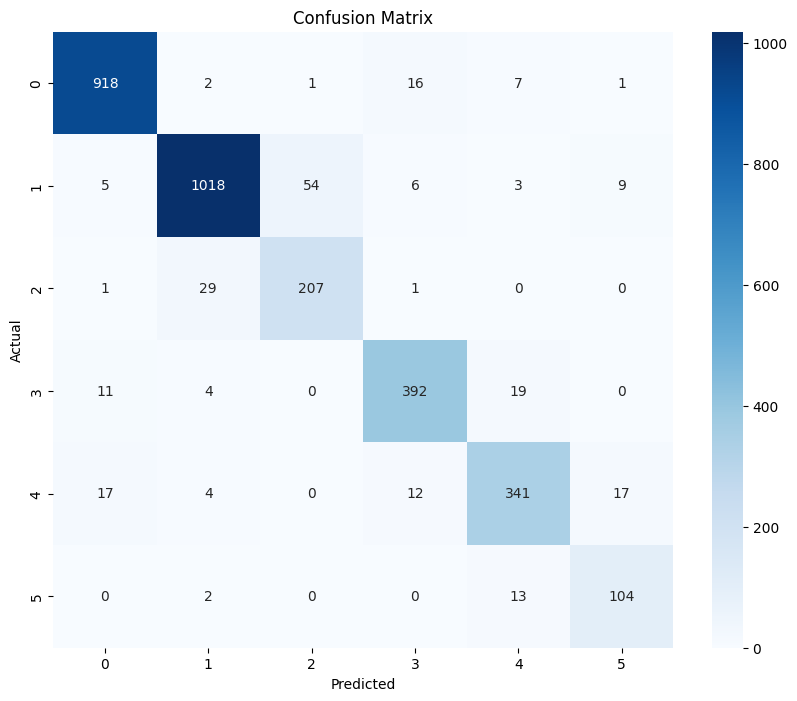

In [3]:
!pip install transformers datasets scikit-learn joblib --quiet

import pandas as pd
import numpy as np
import joblib
import os
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load and prepare data from CSV
df = pd.read_csv("data/cleaned_emotion_data.csv")

# ✅ Add new examples using label indexes
additional_data = pd.DataFrame({
    "cleaned_text": [
        # Anger (3)
        "I will ruin you",
        "You won't escape this",
        "I'm not happy about this",
        "I hate you",
        "I dislike you",
        "You're making me furious",
        "I can't stand this anymore",
        "You make me so angry",
        "This makes my blood boil",
        "You're the worst person I’ve met",
        "I absolutely hate this",
        "I'm holding a grudge I can't let go",
        "Every time I see you, I boil inside",
        "I'm frustrated beyond words",
        "I’m deeply disappointed in you",
        "Your behavior is unacceptable",

        # Fear (4)
        "I'm scared of what's coming",
        "I can't sleep, I'm terrified",
        "What if I fail?",
        "I don’t feel safe anymore",
        "I keep worrying about the future",
        "I'm anxious something bad might happen",
        "This gives me chills",
        "I’m scared to even speak up",
        "I dread what comes next",
        "I feel paralyzed by fear",

        # Sadness (0)
        "You betrayed me",
        "This makes me feel awful",
        "This isn't working out",
        "I feel so empty",
        "I just want to cry",
        "Nothing feels worth it anymore",
        "It hurts to even remember",
        "I feel like I’ve lost everything",
        "I don’t think I’ll ever feel better",
        "Why does everything always fall apart?",

        # Love (2)
        "I love spending time with my family",
        "I adore my partner so much",
        "I feel a deep affection for my friends",
        "This is something I truly cherish",
        "My heart is full of love today",
        "I have a strong emotional bond with my dog",
        "I admire the way she smiles",
        "I feel romantic towards him",
        "I have genuine love for this city",
        "I appreciate all that you do",
        "You mean so much to me",
        "I feel connected to everything around me",
        "He's the love of my life",
        "I miss the way we used to talk every day",
        "I feel warmth whenever I think of you",
        "I can’t stop thinking about her",
        "I care for him deeply",
        "I treasure our moments together",
        "I feel so lucky to have you in my life",
        "This brings me so much joy and affection",
        "I feel emotionally attached to this place",
        "I hold him close to my heart",
        "I feel so loved and appreciated",
        "I feel romantic when we dance together",
        "This gift means the world to me",
        "I feel butterflies when I see him",
        "You’re everything to me",
        "I want to hold you forever",
        "I’m grateful to be loved by you",
        "I cherish the way you laugh"
    ],
    "label": [
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3,  # anger → total 16
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4,     # fear → total 10
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,     # sadness → total 10
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2      # love → total 30
    ]
})



df = pd.concat([df, additional_data], ignore_index=True)


texts = df["cleaned_text"].astype(str).tolist()
labels = df["label"].tolist()

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

os.makedirs("src", exist_ok=True)
joblib.dump(label_encoder, "src/label_encoder.pkl")

dataset = Dataset.from_dict({"text": texts, "label": encoded_labels})
dataset = dataset.train_test_split(test_size=0.2)

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize, batched=True)

def to_tf_dataset(dataset):
    x = {
        "input_ids": np.array(dataset["input_ids"]),
        "attention_mask": np.array(dataset["attention_mask"]),
    }
    y = np.array(dataset["label"])
    return tf.data.Dataset.from_tensor_slices((x, y))

train_dataset = to_tf_dataset(tokenized_datasets["train"]).shuffle(1000).batch(16)
val_dataset = to_tf_dataset(tokenized_datasets["test"]).batch(32)

model = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(label_encoder.classes_)
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# ✅ Increased epochs for better learning
model.fit(train_dataset, validation_data=val_dataset, epochs=7)

model.save_pretrained("bert_emotion_model")
tokenizer.save_pretrained("bert_emotion_model")

print("✅ Model and tokenizer saved to bert_emotion_model/")

y_true = np.array(tokenized_datasets["test"]["label"])
pred_logits = model.predict(val_dataset).logits
y_pred = np.argmax(pred_logits, axis=1)

acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"\n📊 Final Evaluation:\nAccuracy: {acc:.4f}\nF1 Score: {f1:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}")

print("\n📌 Per-Emotion Classification Report:\n")
target_names = [str(label) for label in label_encoder.inverse_transform(sorted(np.unique(y_true)))]
print(classification_report(y_true, y_pred, target_names=target_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [4]:
from transformers import pipeline, TFDistilBertForSequenceClassification, DistilBertTokenizerFast
import joblib
import tensorflow as tf

# ✅ Load local model and tokenizer
model_path = "bert_emotion_model"
model = TFDistilBertForSequenceClassification.from_pretrained(model_path, local_files_only=True)
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path, local_files_only=True)

# ✅ Define fixed emotion mapping
index_to_emotion = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# ✅ Define a function to predict emotion
def predict_emotion(text):
    inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=128)
    logits = model(inputs).logits
    prediction = tf.argmax(logits, axis=1).numpy()[0]
    return index_to_emotion[prediction]

# ✅ Try with user input
while True:
    user_input = input("Enter your text (or type 'exit' to stop): ")
    if user_input.lower() == "exit":
        break
    emotion = predict_emotion(user_input)
    print(f"🔍 Predicted Emotion: {emotion}\n")





Some layers from the model checkpoint at src/bert_emotion_model were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at src/bert_emotion_model and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Enter your text (or type 'exit' to stop): i hate you


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


🔍 Predicted Emotion: anger

Enter your text (or type 'exit' to stop): i adore you
🔍 Predicted Emotion: love

Enter your text (or type 'exit' to stop): i love you
🔍 Predicted Emotion: love

Enter your text (or type 'exit' to stop): i am shocked
🔍 Predicted Emotion: surprise

Enter your text (or type 'exit' to stop): i am enamored by you
🔍 Predicted Emotion: anger

Enter your text (or type 'exit' to stop): i am jumping with joy
🔍 Predicted Emotion: joy

Enter your text (or type 'exit' to stop): i am happy
🔍 Predicted Emotion: joy

Enter your text (or type 'exit' to stop): i am not happy
🔍 Predicted Emotion: sadness

Enter your text (or type 'exit' to stop): i should kill myself
🔍 Predicted Emotion: anger

Enter your text (or type 'exit' to stop): i am appalled at you
🔍 Predicted Emotion: anger

Enter your text (or type 'exit' to stop): exit


In [ ]:
import joblib

# Load your label encoder from file
label_encoder = joblib.load("src/label_encoder.pkl")

# Print index to label mapping
print("📌 Emotion Index Mapping:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"{idx}: {label}")





📌 Emotion Index Mapping:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5


In [ ]:
import joblib

le = joblib.load("src/label_encoder.pkl")
print("📌 Classes stored in label_encoder:")
print(le.classes_)

📌 Classes stored in label_encoder:
[0 1 2 3 4 5]


In [2]:
import os
import joblib

# Make sure the directory exists
os.makedirs("src", exist_ok=True)

# Save model and tokenizer
model.save_pretrained("bert_emotion_model")
tokenizer.save_pretrained("bert_emotion_model")

# Save label encoder
joblib.dump(label_encoder, "src/label_encoder.pkl")

print("✅ Model, tokenizer, and label encoder saved to src/")



NameError: name 'model' is not defined

In [5]:
import os
import joblib

# Make sure directory exists
os.makedirs("/mnt/data/bert_emotion_model", exist_ok=True)

# Save model and tokenizer to /mnt/data so I can access it
model.save_pretrained("/mnt/data/bert_emotion_model")
tokenizer.save_pretrained("/mnt/data/bert_emotion_model")

# Save label encoder as well
joblib.dump(label_encoder, "/mnt/data/src/label_encoder.pkl")

print("✅ Model, tokenizer, and label encoder saved to /mnt/data/src/")


✅ Model, tokenizer, and label encoder saved to /mnt/data/src/


In [6]:
# Zip the model folder
!zip -r bert_emotion_model.zip /mnt/data/bert_emotion_model

# Download it
from google.colab import files
files.download("bert_emotion_model.zip")


  adding: mnt/data/src/bert_emotion_model/ (stored 0%)
  adding: mnt/data/src/bert_emotion_model/vocab.txt (deflated 53%)
  adding: mnt/data/src/bert_emotion_model/tokenizer.json (deflated 71%)
  adding: mnt/data/src/bert_emotion_model/config.json (deflated 51%)
  adding: mnt/data/src/bert_emotion_model/special_tokens_map.json (deflated 80%)
  adding: mnt/data/src/bert_emotion_model/tf_model.h5 (deflated 8%)
  adding: mnt/data/src/bert_emotion_model/tokenizer_config.json (deflated 73%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Download label encoder separately
files.download("/mnt/data/src/label_encoder.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>